regresion logistica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('C:/Datos/framingham.csv') 

In [3]:
df.dropna(inplace=True)

In [4]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [8]:
y_pred = logistic_model.predict(X_test_scaled)

In [9]:
accuracy = accuracy_score(y_test, y_pred)

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [11]:
coefficients = logistic_model.coef_[0]

([<matplotlib.axis.XTick at 0x20a3b848c50>,
 [Text(-0.2762328089959631, 0, '−0.276'),
  Text(-0.07623280899596308, 0, '−0.076'),
  Text(0.12376719100403694, 0, '0.124'),
  Text(0.323767191004037, 0, '0.324'),
  Text(0.5237671910040369, 0, '0.524'),
  Text(0.7237671910040369, 0, '0.724')])

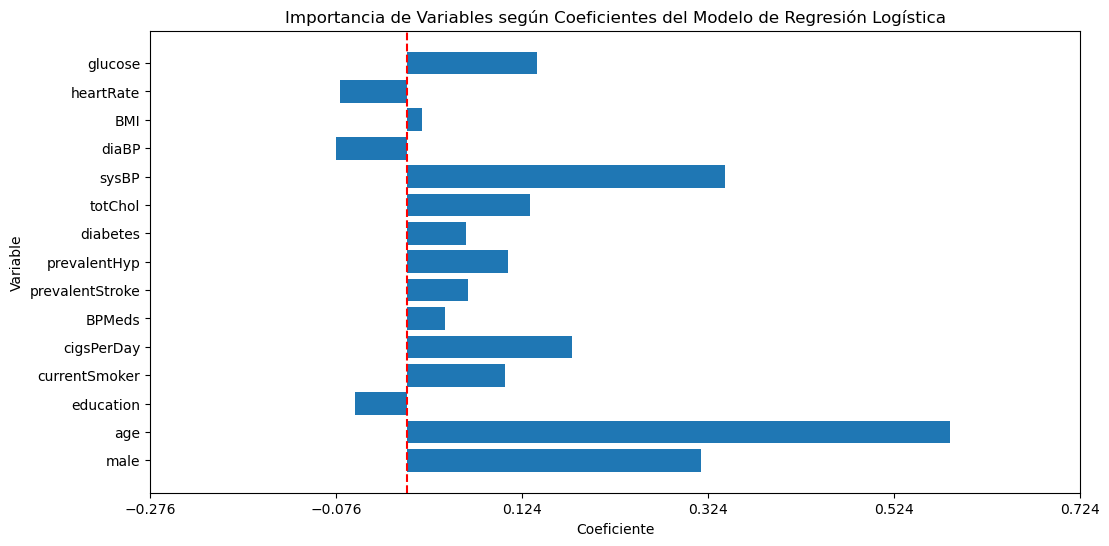

In [12]:
plt.figure(figsize=(12, 6))
plt.barh(X.columns, coefficients)
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Importancia de Variables según Coeficientes del Modelo de Regresión Logística')
plt.axvline(x=0, color='r', linestyle='--')
plt.xticks(np.arange(min(coefficients) - 0.2, max(coefficients) + 0.2, 0.2))

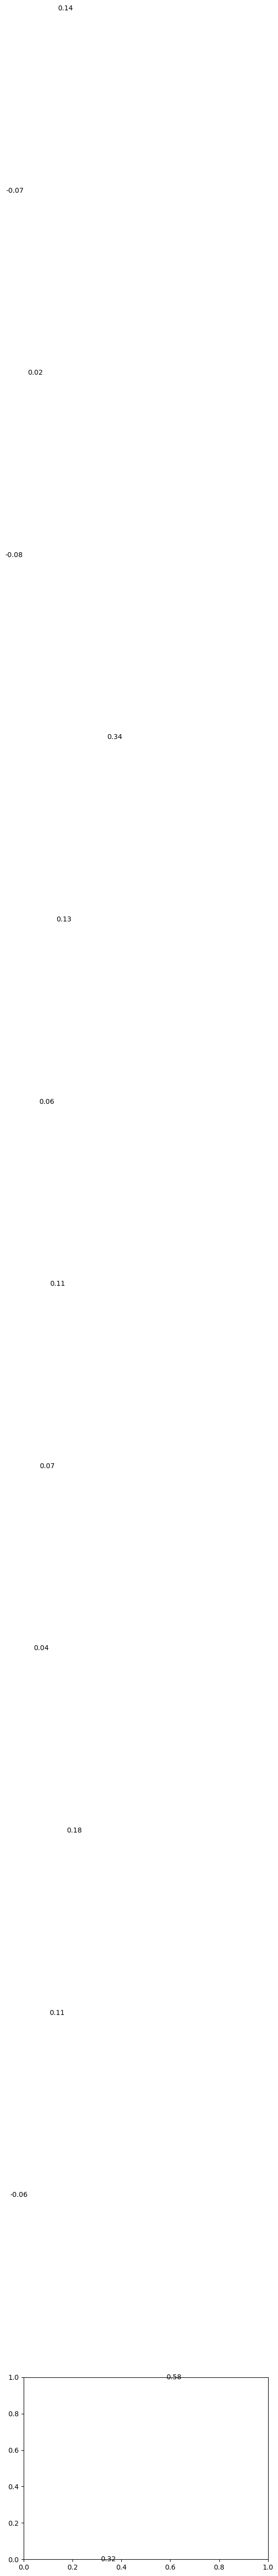

In [13]:
for i, coef in enumerate(coefficients):
    plt.text(coef, i, round(coef, 2), va='center')

plt.show()